# Multinomial Classification (normal or DOS or PROBE or R2L or U2R)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
import itertools
import seaborn as sns
import statsmodels.formula.api as sm
from patsy import dmatrices

In [22]:
from sklearn import preprocessing
import sklearn.metrics as metrics

In [23]:
data=pd.read_csv('CIDDS-001-external-week2.csv')
data.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,00:14.5,0.0,TCP,19394_40,54719,EXT_SERVER,23.0,1,46,1,....S.,0,suspicious,---,---,---
1,00:14.5,0.0,TCP,EXT_SERVER,23,19394_40,54719.0,1,40,1,.A.R..,0,suspicious,---,---,---
2,00:33.5,0.0,TCP,19395_18,4622,EXT_SERVER,7547.0,1,46,1,....S.,0,suspicious,---,---,---
3,00:33.5,0.0,TCP,EXT_SERVER,7547,19395_18,4622.0,1,40,1,.A.R..,0,suspicious,---,---,---
4,00:40.2,0.0,TCP,11246_253,6000,EXT_SERVER,3306.0,1,46,1,....S.,0,suspicious,---,---,---


In [24]:
columns=["Date_first_seen","Duration","Proto","Src_IP_Addr","Src_Pt","Dst_IP_Addr","Dst_Pt","Packets","Bytes","Flows","Flags",
         "Tos","class","attackType","attackID","attackDescription"] 

In [25]:
len(columns)

16

In [26]:
data.columns=columns

In [27]:
data.head()

,Date_first_seen,Duration,Proto,Src_IP_Addr,Src_Pt,Dst_IP_Addr,Dst_Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,00:14.5,0.0,TCP,19394_40,54719,EXT_SERVER,23.0,1,46,1,....S.,0,suspicious,---,---,---
1,00:14.5,0.0,TCP,EXT_SERVER,23,19394_40,54719.0,1,40,1,.A.R..,0,suspicious,---,---,---
2,00:33.5,0.0,TCP,19395_18,4622,EXT_SERVER,7547.0,1,46,1,....S.,0,suspicious,---,---,---
3,00:33.5,0.0,TCP,EXT_SERVER,7547,19395_18,4622.0,1,40,1,.A.R..,0,suspicious,---,---,---
4,00:40.2,0.0,TCP,11246_253,6000,EXT_SERVER,3306.0,1,46,1,....S.,0,suspicious,---,---,---


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159373 entries, 0 to 159372
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_first_seen    159373 non-null  object 
 1   Duration           159373 non-null  float64
 2   Proto              159373 non-null  object 
 3   Src_IP_Addr        159373 non-null  object 
 4   Src_Pt             159373 non-null  int64  
 5   Dst_IP_Addr        159373 non-null  object 
 6   Dst_Pt             159373 non-null  float64
 7   Packets            159373 non-null  int64  
 8   Bytes              159373 non-null  int64  
 9   Flows              159373 non-null  int64  
 10  Flags              159373 non-null  object 
 11  Tos                159373 non-null  int64  
 12  class              159373 non-null  object 
 13  attackType         159373 non-null  object 
 14  attackID           159373 non-null  object 
 15  attackDescription  159373 non-null  object 
dtypes:

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,159373.0,79.663156,5.552439e+03,0.0,0.064,9.072,10.661,5.841996e+05
Src_Pt,159373.0,21719.480031,2.347204e+04,0.0,22.000,8000.000,45759.000,6.553500e+04
Dst_Pt,159373.0,21552.513306,2.348181e+04,0.0,22.000,8000.000,45588.000,6.553500e+04
Packets,159373.0,18.475074,7.018269e+02,1.0,6.000,15.000,19.000,1.191280e+05
Bytes,159373.0,9651.430644,1.387046e+06,28.0,441.000,2163.000,3185.000,3.185000e+08
Flows,159373.0,1.000000,0.000000e+00,1.0,1.000,1.000,1.000,1.000000e+00
Tos,159373.0,0.000000,0.000000e+00,0.0,0.000,0.000,0.000,0.000000e+00


In [30]:
data.shape

(159373, 16)

In [31]:
data.drop(["Date_first_seen","Flows","Tos","attackType","attackID","attackDescription","Src_IP_Addr","Dst_IP_Addr"],axis=1,inplace=True)
data.head()

,Duration,Proto,Src_Pt,Dst_Pt,Packets,Bytes,Flags,class
0,0.0,TCP,54719,23.0,1,46,....S.,suspicious
1,0.0,TCP,23,54719.0,1,40,.A.R..,suspicious
2,0.0,TCP,4622,7547.0,1,46,....S.,suspicious
3,0.0,TCP,7547,4622.0,1,40,.A.R..,suspicious
4,0.0,TCP,6000,3306.0,1,46,....S.,suspicious


In [32]:
data["Bytes"]=data["Bytes"].astype(int)

### Basic Exploratory Analysis

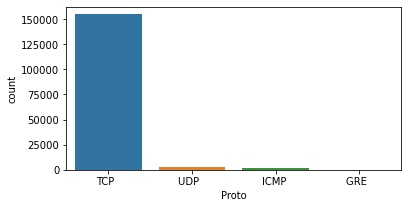

In [33]:
# Protocol type distribution
plt.figure(figsize=(6,3))
sns.countplot(x="Proto", data=data)
plt.show()

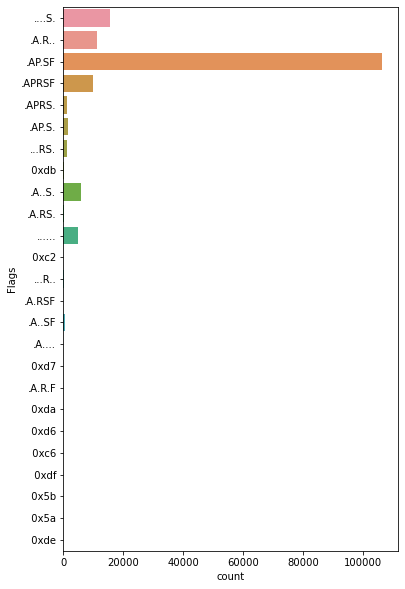

In [34]:
# flags distribution
plt.figure(figsize=(6,10))
sns.countplot(y="Flags", data=data)
plt.show()

In [35]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object', 'O']]

In [36]:
numeric_var_names

['Duration', 'Src_Pt', 'Dst_Pt', 'Packets', 'Bytes']

In [37]:
cat_var_names

['Proto', 'Flags', 'class']

In [38]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['Proto']= label_encoder.fit_transform(data['Proto']) 
data['Flags']= label_encoder.fit_transform(data['Flags']) 
data['class']= label_encoder.fit_transform(data['class']) 
data.head()

,Duration,Proto,Src_Pt,Dst_Pt,Packets,Bytes,Flags,class
0,0.0,2,54719,23.0,1,46,11,2
1,0.0,2,23,54719.0,1,40,17,2
2,0.0,2,4622,7547.0,1,46,11,2
3,0.0,2,7547,4622.0,1,40,17,2
4,0.0,2,6000,3306.0,1,46,11,2


In [115]:
data[data["class"]==4]

,Duration,Proto,Src_Pt,Dst_Pt,Packets,Bytes,Flags,class
32838,0.000,2,80.0,62661.0,1,40,12,4
32840,0.000,2,443.0,62661.0,1,40,17,4
32842,0.000,2,443.0,62917.0,1,40,17,4
32844,0.000,2,111.0,62917.0,1,40,17,4
32846,0.000,2,113.0,62917.0,1,40,17,4
...,...,...,...,...,...,...,...,...
43163,1.869,2,22.0,51370.0,17,2525,22,4
43165,2.467,2,22.0,51372.0,17,2525,22,4
43167,2.408,2,22.0,51374.0,17,2525,22,4
43171,2.829,2,22.0,51376.0,17,2525,22,4


In [112]:
data[32830:32850]

,Duration,Proto,Src_Pt,Dst_Pt,Packets,Bytes,Flags,class
32830,10.185,2,22.0,29539.0,19,3185,22,2
32831,31.003,2,17634.0,22.0,3,180,11,2
32832,31.003,2,22.0,17634.0,8,480,15,2
32833,31.003,2,64200.0,22.0,3,180,11,2
32834,31.003,2,22.0,64200.0,8,480,15,2
32835,31.003,2,63565.0,22.0,3,180,11,2
32836,31.003,2,22.0,63565.0,8,480,15,2
32837,0.000,2,62661.0,80.0,1,46,14,0
32838,0.000,2,80.0,62661.0,1,40,12,4
32839,0.000,2,62661.0,443.0,1,46,11,0


### Data Audit Report

In [41]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data.apply(lambda x: var_summary(x)).T

In [42]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Duration,159373.0,0.0,1.269616e+07,79.663156,9.072,5.552439e+03,3.082958e+07,0.0,0.0,0.0,0.0,0.064,9.072,10.661,25.064,30.996,31.265,5.841996e+05
Proto,159373.0,0.0,3.196670e+05,2.005779,2.000,1.750163e-01,3.063071e-02,0.0,1.0,2.0,2.0,2.000,2.000,2.000,2.000,2.000,3.000,3.000000e+00
Src_Pt,159373.0,0.0,3.461499e+09,21719.480031,8000.000,2.347204e+04,5.509366e+08,0.0,0.0,22.0,22.0,22.000,8000.000,45759.000,57391.000,60962.000,64408.280,6.553500e+04
Dst_Pt,159373.0,0.0,3.434889e+09,21552.513306,8000.000,2.348181e+04,5.513953e+08,0.0,3.3,22.0,22.0,22.000,8000.000,45588.000,57358.000,60955.000,64412.560,6.553500e+04
Packets,159373.0,0.0,2.944428e+06,18.475074,15.000,7.018269e+02,4.925610e+05,1.0,1.0,1.0,1.0,6.000,15.000,19.000,23.000,26.000,28.000,1.191280e+05
Bytes,159373.0,0.0,1.538177e+09,9651.430644,2163.000,1.387046e+06,1.923896e+12,28.0,40.0,40.0,46.0,441.000,2163.000,3185.000,3249.000,3745.000,4441.000,3.185000e+08
Flags,159373.0,0.0,3.173440e+06,19.912030,22.000,4.158383e+00,1.729215e+01,0.0,10.0,11.0,11.0,17.000,22.000,22.000,22.000,24.000,24.000,2.400000e+01
class,159373.0,0.0,2.998810e+05,1.881630,2.000,5.868466e-01,3.443889e-01,0.0,0.0,1.0,1.0,2.000,2.000,2.000,2.000,3.000,4.000,4.000000e+00


### Handling Outlier

In [43]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

data=data.apply(outlier_capping)

In [44]:
# correlation matrix (ranges from 1 to -1)
corrm=data.corr()
corrm

,Duration,Proto,Src_Pt,Dst_Pt,Packets,Bytes,Flags,class
Duration,1.000000,-0.036767,-0.131039,-0.124467,0.537082,0.456106,0.117413,0.449844
Proto,-0.036767,1.000000,0.051179,0.010770,-0.047034,-0.038679,-0.083255,0.007483
Src_Pt,-0.131039,0.051179,1.000000,-0.647807,-0.165383,-0.269485,-0.034636,-0.259226
Dst_Pt,-0.124467,0.010770,-0.647807,1.000000,0.025714,0.111220,0.194022,-0.060205
Packets,0.537082,-0.047034,-0.165383,0.025714,1.000000,0.956115,0.706030,0.101212
Bytes,0.456106,-0.038679,-0.269485,0.111220,0.956115,1.000000,0.670422,0.122094
Flags,0.117413,-0.083255,-0.034636,0.194022,0.706030,0.670422,1.000000,-0.236614
class,0.449844,0.007483,-0.259226,-0.060205,0.101212,0.122094,-0.236614,1.000000


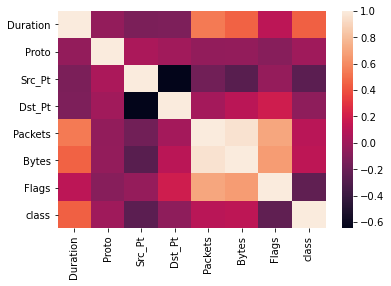

In [45]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corrm)

## Model Building

In [49]:
from sklearn.model_selection import train_test_split

X = data[["Duration","Proto","Src_Pt","Dst_Pt","Packets","Bytes","Flags"]]
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Boosting Algorithms

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

1) AdaBoost

2) Stochastic Gradient Boosting

#### 1. AdaBoost

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [66]:
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8570882216094402


In [67]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=30, random_state=7)

In [68]:
y_pred=model.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 1])

In [69]:
accuracy_score( y_test, y_pred )

0.8809560025858463

# Save Model

In [70]:
import pickle
# Saving model to disk of random forest
pickle.dump(model, open('model.pkl','wb'))

# Load Model and Predict

In [71]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[0,2,54719,23.0,1,46,11]])

array([2])

Duration	Proto	Src_Pt	Dst_Pt	Packets	Bytes	Flags	class